#Comparação do Happines Score entre países desenvolvidos e em desenvolvimento


SME0221 Introdução à Inferência Estatística - 2023 - Trabalho prático

Prof. Cibele Russo

Lucas Garzeri de Melo - 13731344

(o grupo sou só eu pois já havia desenvolvido o trabalho completo sozinho)

## Introdução

"The World Happiness Report, published by the Sustainable Development Solutions Network (SDSN) and powered by Gallup World Poll data, provides valuable insights into happiness rankings and factors influencing well-being. This dataset utilizes life evaluations from the Gallup World Poll, based on the Cantril ladder approach, to determine happiness rankings. It also explores six key variables, including GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption, to explain variations in happiness across countries. Gain a deeper understanding of happiness and well-being through this concise and comprehensive dataset."

O trecho acima é uma breve descrição do dataset segundo seu autor. Em minha análise, levei em consideração o "Happines Score" e para realiza-la separei o dataset em dois grupos de países: desenvolvidos e em desenvolvimento.

Com essa separação dos dados, o propósito dessa análise é tentar provar, através da análise de dados, teste de normalidade e teste de hipótese, que a média do "Happines Score" em países desenvolvidos é maior do que a dos países em desenvolvimento.

Link do dataset: https://www.kaggle.com/datasets/atom1991/world-happiness-report-2023



## Desenvolvimento

### Importação de bibliotecas necessárias

In [40]:
# bibliotecas necessarias para realizar as análises
import pandas as pd
import numpy as np
from scipy.stats import  shapiro, boxcox, mannwhitneyu, f, stats, norm
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Extração, Descrição e análise exploratória dos dados

In [ ]:
df = pd.read_csv('/content/whr2023.csv')
df.head()

In [42]:
# Separar o dataset em países em desenvolvimento e desenvolvidos

paises_em_desenvolvimento = ['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Bahrain', 'Bangladesh', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia',
                             'Cameroon', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Cyprus', 'Czechia', 'Dominican Republic', 'Ecuador', 'Egypt',   'El Salvador', 'Ethiopia', 'Gabon',
                             'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Honduras',  'India', 'Indonesia',  'Iran', 'Iraq', 'Ivory Coast', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Liberia',
                             'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
                             'North Macedonia', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Russia',  'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone',  'South Africa', 'Sri Lanka', 'State of Palestine',
                             'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tunisia',  'Turkiye', 'Uganda','Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe']

paises_desenvolvidos = ['Australia', 'Austria', 'Belgium', 'Canada', 'Croatia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',  'Japan', 'Latvia',
                       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Singapore', 'Slovakia',  'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China',
                       'United Arab Emirates', 'United Kingdom', 'United States']

In [43]:
# Selecionar apenas as colunas de interesse para a análise
df = df[['Country name', 'Happiness score']]

# Verificar se há algum valor NaN (nenhum valor Nan encontrado nas colunas de interesse)
contagem_nan = df.isnull().sum()

# Diviir o df em dois para realizar análises separadas
df_des = df[df['Country name'].isin(paises_desenvolvidos)]
df_sub = df[df['Country name'].isin(paises_em_desenvolvimento)]

In [44]:
# Função para mostrar a distribuição dos dados em gráficos
def mostrar_distribuicao(var, dataframe):
    var_min = dataframe[var].min()
    var_mean = dataframe[var].mean()
    var_median = dataframe[var].median()
    var_mode = dataframe[var].mode()[0]
    var_max = dataframe[var].max()

    # Histograma
    fig, ax = plt.subplots(2, 1, figsize=(4, 4))
    sns.histplot(dataframe, x=var, kde=True, color='red', alpha=0.2, ax=ax[0])
    ax[0].set_ylabel("Frequencia")

    ax[0].axvline(x=var_min, color='gray', linewidth=2, linestyle="--")
    ax[0].axvline(x=var_mean, color='blue', linewidth=2, linestyle="--")
    ax[0].axvline(x=var_median, color='brown', linewidth=2, linestyle="--")
    ax[0].axvline(x=var_mode, color='cyan', linewidth=2, linestyle="--")
    ax[0].axvline(x=var_max, color='gray', linewidth=2, linestyle="--")

    # Box plot
    sns.boxplot(dataframe, x=var, width=0.3, ax=ax[1])
    ax[1].set_xlabel("Value")

    fig.suptitle("Distribuicao dos dados - " + var, size=15)
    plt.show()

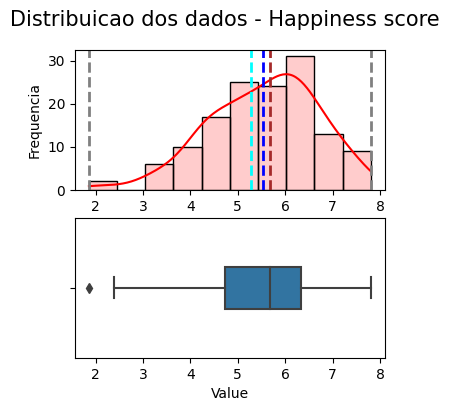

,Happiness score
count,137.000000
mean,5.539796
std,1.139929
min,1.859000
25%,4.724000
50%,5.684000
75%,6.334000
max,7.804000


In [45]:
# Plotar histograma do Happiness score no df sem divisão
mostrar_distribuicao("Happiness score", df)

# Análise descritiva de todos os países juntos
df.describe()

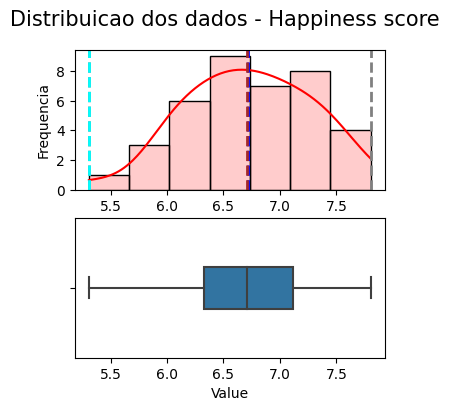

,Happiness score
count,38.000000
mean,6.720000
std,0.558893
min,5.308000
25%,6.326250
50%,6.712000
75%,7.116500
max,7.804000


In [46]:
# Plotar histograma do Happiness score em países desenvolvidos
mostrar_distribuicao("Happiness score", df_des)

# Análise descritiva dos países desenvolvidos
df_des.describe()

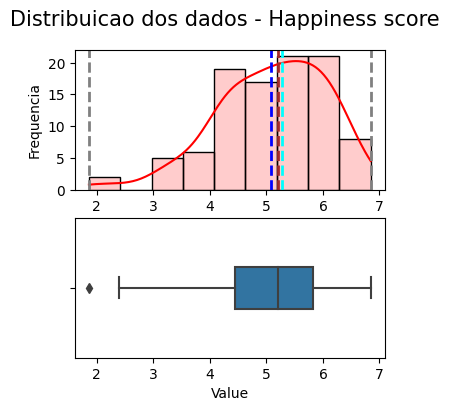

,Happiness score
count,99.000000
mean,5.086788
std,0.968484
min,1.859000
25%,4.437000
50%,5.211000
75%,5.822000
max,6.845000


In [47]:
# Plotar histograma do Happiness score em países desenvolvidos
mostrar_distribuicao("Happiness score", df_sub)

# Análise descritiva dos países em desenvolvimento
df_sub.describe()

### Teste para normalidade dos dados

Analisando os histograms plotados (df_des e df_sub) percebe-se que as amostras não possuem a mesma distribuição. Mas, para rejeitar a normalidade é necessário realizar o teste de normalidade.

In [48]:
# Função para verificar normalidade dos dados
def verificar_normalidade(Data):
    shapiro_stats, p_value = shapiro(Data)

    print("Estatísticas do teste de Shapiro-Wilk :")
    print(f"   Estatística de teste: {shapiro_stats}")
    print(f"   Valor p: {p_value}")
    print("")

In [49]:
# Realizar o teste de normalidade para os dados de países juntos
# e com as amostras separadas

verificar_normalidade(df["Happiness score"])
verificar_normalidade(df_sub["Happiness score"])
verificar_normalidade(df_des["Happiness score"])

Estatísticas do teste de Shapiro-Wilk :
   Estatística de teste: 0.9825135469436646
   Valor p: 0.07666660845279694

Estatísticas do teste de Shapiro-Wilk :
   Estatística de teste: 0.9668084979057312
   Valor p: 0.013326925225555897

Estatísticas do teste de Shapiro-Wilk :
   Estatística de teste: 0.9853388071060181
   Valor p: 0.8901134729385376





Após realizar o teste de normalidade, nota-se que o Valor p do teste realizado para a amostra de países em desnvolvimento é abaixo de 5% (~1%), logo, constata-se que o que foi visto no histograma estava certo e recusa-se a normalidade dessa amostra de dados.


In [50]:
# Aplicar a transformação de Box-Cox para normalizar os dados
transformed_data, lambda_value = boxcox(df['Happiness score'])

# Atualizar a coluna "Happiness score normalizado" com os dados transformados
df['Happiness score'] = transformed_data


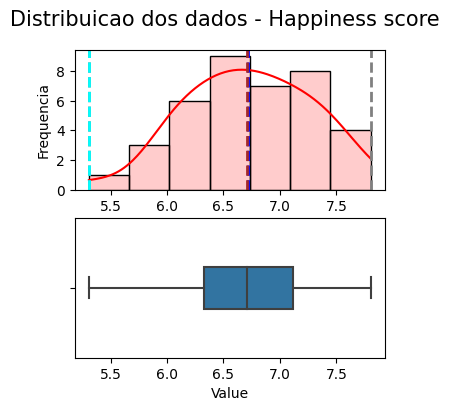

In [51]:
mostrar_distribuicao("Happiness score", df_des)

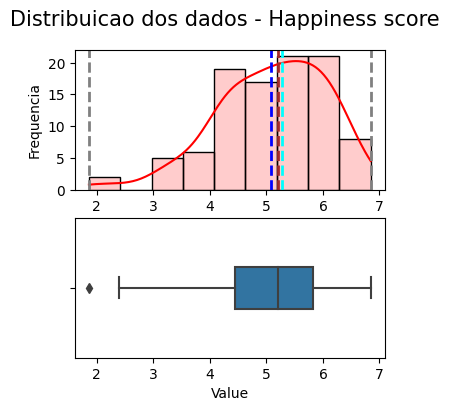

In [52]:
mostrar_distribuicao("Happiness score", df_sub)

In [53]:
# Redefinir df's para que recebam os valores normalizados do Happiness score
df_des = df[df['Country name'].isin(paises_desenvolvidos)]
df_sub = df[df['Country name'].isin(paises_em_desenvolvimento)]

verificar_normalidade(df['Happiness score'])
verificar_normalidade(df_sub["Happiness score"])
verificar_normalidade(df_des["Happiness score"])


Estatísticas do teste de Shapiro-Wilk :
   Estatística de teste: 0.9925500154495239
   Valor p: 0.690488338470459

Estatísticas do teste de Shapiro-Wilk :
   Estatística de teste: 0.9852666854858398
   Valor p: 0.33877336978912354

Estatísticas do teste de Shapiro-Wilk :
   Estatística de teste: 0.9869723320007324
   Valor p: 0.929887592792511



Após realizar a transformação Box-cox, nota-se que os dados de Happiness score estão normalizados, dessa maneira é possível realizar o teste de hipótese para comparação de médias.

In [54]:
# Realizar o teste de Mann-Whitney U
statistic, p_value = mannwhitneyu(df_des['Happiness score'], df_sub['Happiness score'])

# Exibir os resultados
print("Resultado do teste de Mann-Whitney:")
print(f"   Estatística do teste: {statistic}")
print(f"   Valor p: {p_value}")

Resultado do teste de Mann-Whitney:
   Estatística do teste: 3548.5
   Valor p: 1.1054660244412014e-15


### Teste para comparação de média entre as duas amostras

Dos dados acima extraímos que os desvios padrões amostrais são diferentes entre os dados de países desenvolvidos e em desenvolvimento. Ademais, como n1 e n2 >= 30, utilizaremos a seguindo fórmula para enconrar o valor Z:

$ Z = \frac{{\overline{X1} - \overline{X2}}}{{\sqrt{\frac{{S1^2}}{{n1}} + \frac{{S2^2}}{{n2}}}}}$

E as hipóteses consideradas serão:

$\begin{cases}
 H_0: \mu_d = mu_s, contra \\
 H_1: \mu_d > mu_s
 \end{cases}$

Onde $\mu_d$ é a media do Happiness score em países desenvolvidos e $\mu_s$, em países em desenvolvimento.

In [55]:
# Calcular as médias amostrais
mu_d = df_des['Happiness score'].mean()
mu_s = df_sub['Happiness score'].mean()

# Calcular os desvios padrões amostrais
S_d = np.std(df_des['Happiness score'])
S_s = np.std(df_sub['Happiness score'])

# Calcular o tamanho n1 e n2 das amostras
n1 = df_des['Happiness score'].count()
n2 = df_sub['Happiness score'].count()

Das funções acima tem-se os seguintes valores:

$\mu_d = 11.04$

$\mu_s = 6.27$

$S_d = 1.7673$

$S_s = 2.5355$

$n1 = 38$

$n2 = 99$

In [56]:
# Fixar alpha como 5%
nivel_significancia = 0.05

# Calcular os pontos críticos da Região Crítica
Zc = norm.ppf(1 - nivel_significancia)
print("Valor de Z critico:", Zc)

Valor de Z critico: 1.6448536269514722


In [57]:
# Calcular o valor de Z
numerador = mu_d - mu_s
denominador = math.sqrt((S_d**2 / n1) + (S_s**2 / n2))
Z = numerador / denominador

print("Valor de Z:", Z)

Valor de Z: 12.405912148627596


#### Gráfico da dstribuição normal com Z e Zc

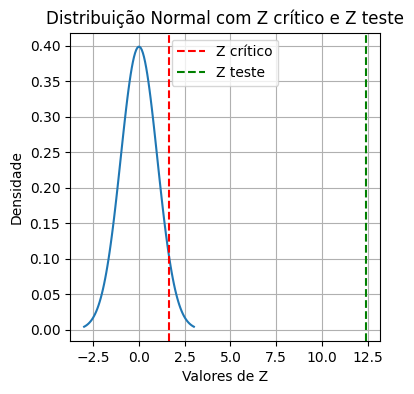

In [58]:
# Definir parâmetros da distribuição normal
media = 0
desvio_padrao = 1

# Gerar os dados da distribuição normal
x = np.linspace(-3*desvio_padrao, 3*desvio_padrao, 100)
y = norm.pdf(x, media, desvio_padrao)

# Valor crítico de Z
z_critico = Zc

# Valor de Z encontrado no teste de hipótese
z_teste = Z

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(x, y)
plt.axvline(x=z_critico, color='red', linestyle='--', label='Z crítico')
plt.axvline(x=z_teste, color='green', linestyle='--', label='Z teste')
plt.title('Distribuição Normal com Z crítico e Z teste')
plt.xlabel('Valores de Z')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

### Conclusão

Em conclusão, este trabalho envolveu a extração, descrição e análise exploratória dos dados sobre o dataset "World Happiness Report 2023". O conjunto de dados original foi dividido em países desenvolvidos e em desenvolvimento, realizou-se a análise exploratória e em seguida, foi realizado o teste de normalidade nos dados.

Os resultados indicaram que os dados dos países em desenvolvimento não seguiram uma distribuição normal. Para contornar essa questão, foi aplicada a transformação Box-Cox nos dados, a fim de normalizá-los.

Posteriormente, um teste de hipótese foi conduzido para comparar as médias dos países desenvolvidos e em desenvolvimento. A hipótese nula (H0) afirmava que as médias eram iguais, enquanto a hipótese alternativa (H1) afirmava que a média dos países desenvolvidos era maior do que a dos países em desenvolvimento.

Com base nos resultados obtidos, foi possível concluir que há evidências estatísticas para rejeitar a hipótese nula em favor da hipótese alternativa. Isso sugere que, em média, os países desenvolvidos têm um "Happiness score" maior do que os países em desenvolvimento.

Em suma, este trabalho forneceu uma visão estatística sobre a relação entre o Happiness score, a divisão entre países desenvolvidos e em desenvolvimento, e a comparação das médias. Os resultados sugerem que existe uma diferença significativa nas médias dos países desenvolvidos e em desenvolvimento, com os países desenvolvidos apresentando, em média, um Happiness score mais alto, como imaginado no início deste trabalho.